In [23]:
import numpy as np
import seaborn as sns
from Maze_big import Maze

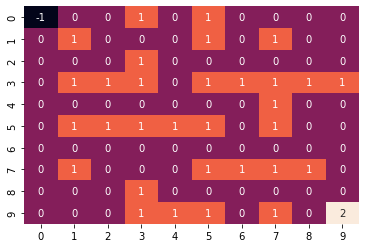

In [24]:
env = Maze()
env.reset()
env.plot()

In [25]:
action_value = np.full((10, 10, 4), -1.0, dtype = np.float16)
action_value[9, 9, :] = 0

In [26]:
def target_policy(state):
    av = action_value[tuple(state)]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [27]:
def b_policy(state, epsilon = 0.2):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(4)
    else:
        av = action_value[tuple(state)]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [28]:
def off_policy_mc_control(target_policy, b_policy, Q, episodes, gamma=0.99, epsilon=0.2, alpha = 0.2):
    csa = np.zeros((10, 10, 4))
    
    for episode in range(1, episodes+1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = b_policy(state, epsilon = epsilon)
            next_state, reward, done = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
            
        for state_t, action_t, reward_t in reversed(transitions):
            state_t = tuple(state_t)
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = Q[state_t][action_t]
            Q[state_t][action_t] += (W / csa[state_t][action_t]) * (G - qsa) 
            
            if action_t != target_policy(state_t):
                break
                
            W = W * 1.0 / (1 - epsilon + epsilon / 4 )

In [29]:
env.reset()
off_policy_mc_control(target_policy=target_policy, b_policy=b_policy, Q=action_value, episodes=1000)

<AxesSubplot:>

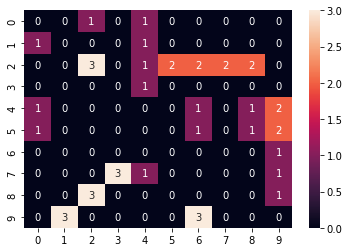

In [30]:
sns.heatmap(np.argmax(action_value, axis = 2), annot=True)

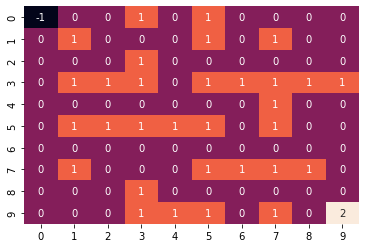

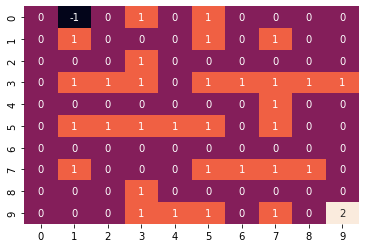

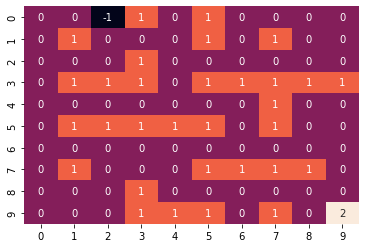

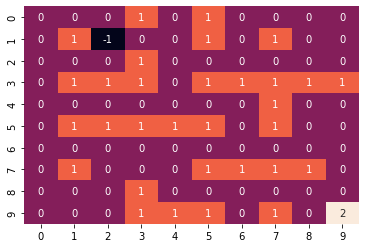

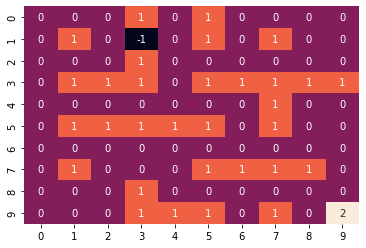

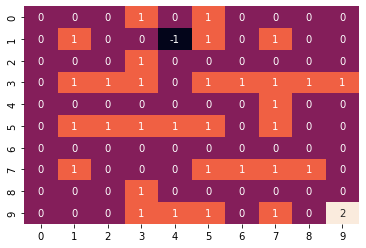

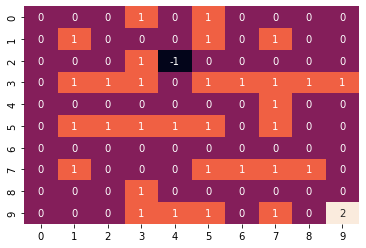

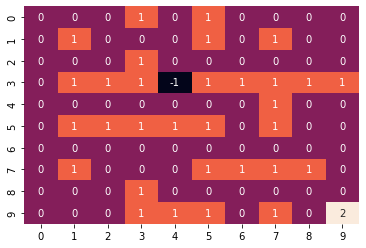

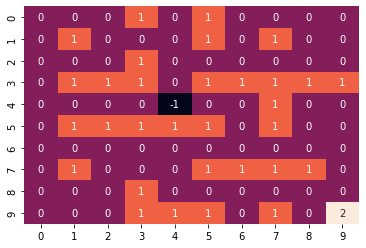

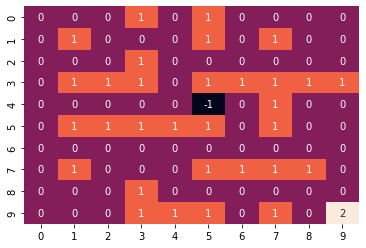

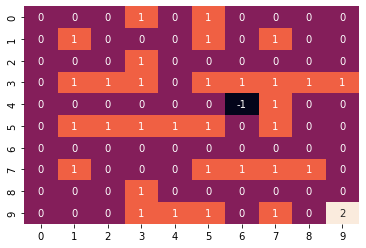

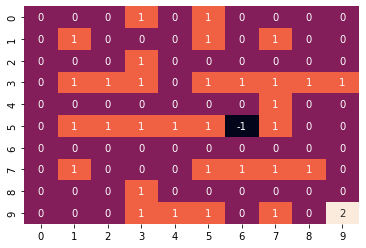

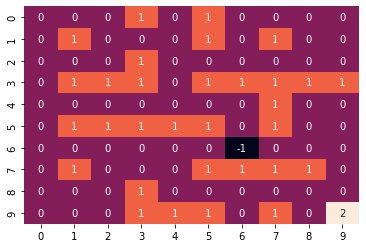

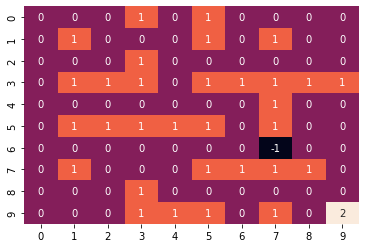

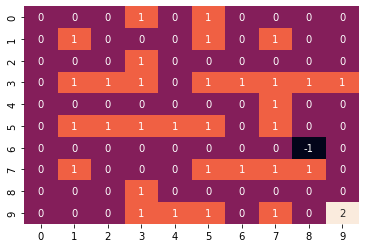

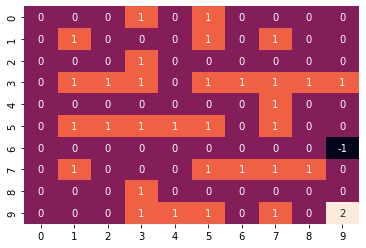

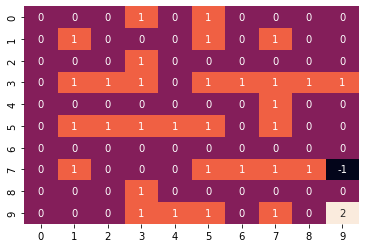

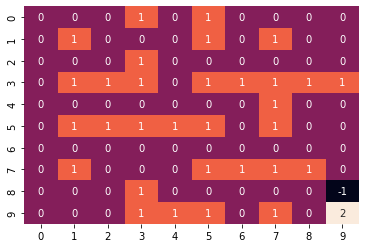

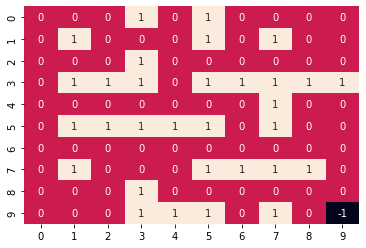

In [31]:
env.reset()
done = False

while done == False:
    env.plot()
    action = np.argmax(action_value[env.current_pos[0], env.current_pos[1]])
    _, _, done = env.step(action)
    
env.plot()